# Importing Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
import math
import pickle
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from math import pi
from pandas.plotting import parallel_coordinates
import networkx as nx

# Algorithms
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV


# Load the dataset

In [35]:
wine=pd.read_csv("winequality.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Understanding Data

In [36]:
# See the number of rows and columns
print("Rows, columns: " + str(wine.shape))

# See the first five rows of the dataset
wine.head()

Rows, columns: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [37]:
# Remove spaces and rename columns
wine.rename(columns= {'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar': 'residual_sugar', 'free sulfur dioxide': 'free_sulfur_dioxide','total sulfur dioxide': 'total_sulfur_dioxide' }, inplace=True)
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
# In the data there is no categorical variables to study but we have all numerical variables
# 11 of the features are floats, 1 is integers.
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


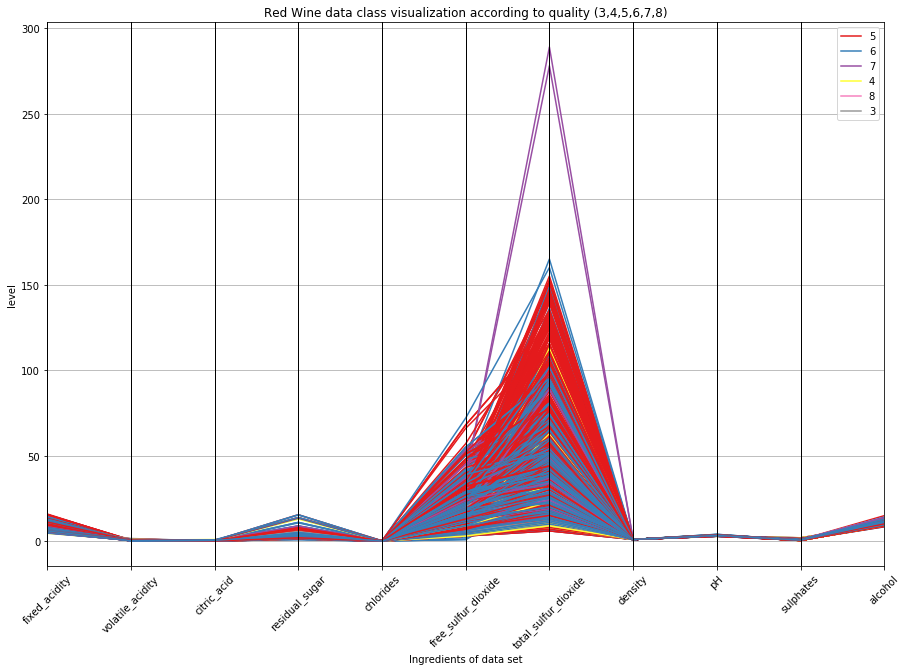

In [39]:
# Make a plot
plt.figure(figsize=(15,10))
parallel_coordinates(wine, 'quality', colormap=plt.get_cmap("Set1"))
plt.title("Red Wine data class visualization according to quality (3,4,5,6,7,8)")
plt.xlabel("Ingredients of data set")
plt.ylabel("level")
plt.xticks(rotation=45)
plt.savefig('Data_class_visualization.png')
plt.show()

In [40]:
#Number of unique values in this dataset

for col in wine.columns.values:
 print("Number of unique values of {}:{}".format(col,wine[col].nunique()))

Number of unique values of fixed_acidity:96
Number of unique values of volatile_acidity:143
Number of unique values of citric_acid:80
Number of unique values of residual_sugar:91
Number of unique values of chlorides:153
Number of unique values of free_sulfur_dioxide:60
Number of unique values of total_sulfur_dioxide:144
Number of unique values of density:436
Number of unique values of pH:89
Number of unique values of sulphates:96
Number of unique values of alcohol:65
Number of unique values of quality:6


In [41]:
#Describe the dataset to get a better idea on what's happening
wine.describe(include='all')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Observations:

Chlorides - Mininmum of 0.012, Maximum of 0.611 meaning some wines are really salty

Residual sugar - Minimum of 0.9, Maximum of 15.5. Some wines are really sweet

Fixed acidity ranges from 25% - 7.1 and 50% - 7.9. This could explain the huge number of outliers

pH - some wines are much more acid than others

The mean is more than median (50th percentile) in all columns

There is a large difference in 75% percentile and max in residual sugar,free sulfur dioxide,total sulfur dioxide

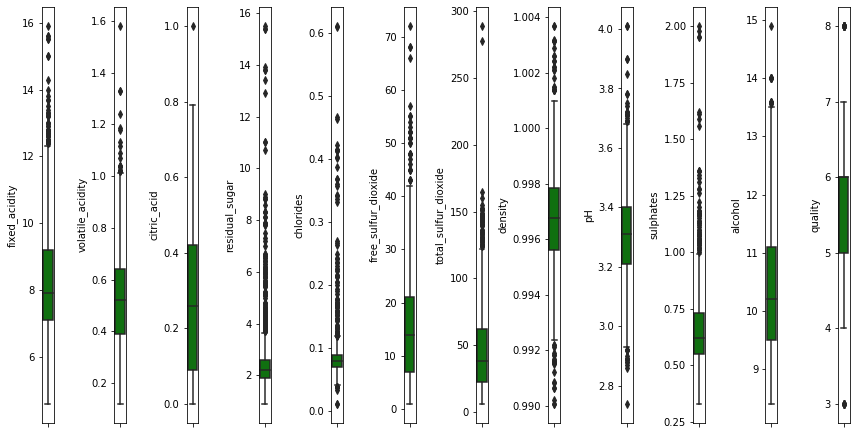

In [42]:
#Distribution of outliers within the data
collist=wine.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(0,len(collist)):
 plt.subplot(nrows,ncol,i+1)
 sns.boxplot(wine[collist[i]],color='green',orient='v')
 plt.tight_layout()

In [43]:
# Check Missing Values
print(wine.isna().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


The data looks very clean by looking at the first five rows

# Exploring Variables

In [44]:
# Histogram for the 'quality' variable making sure there is enough good quality wine
fig = px.histogram(wine,x='quality')
fig.show()
plt.savefig("Histogram.png")


<Figure size 432x288 with 0 Axes>

Observation:
    
Quality has most values concentrated in the categories of 5,6,7

Fewer values are concentrated in the categories of 3,4 8

In [45]:
# PLot pH histogram and scatter plot
# trace1 is scatter plot
data = wine.loc[:,["pH","citric_acid","residual_sugar","density"]]
data_1 = wine.quality
x = dict(zip(data_1.unique(),"rgb"))
trace1 = go.Scatter(
    x=data.index,
    y=data.pH,
    mode = "markers",
    xaxis='x2',
    yaxis='y2',
    name = "pH",
    marker = dict(color = 'rgba(0, 112, 20, 0.8)'),
)

# trace2 is histogram
trace2 = go.Histogram(
    x=data.pH,
    opacity=0.75,
    name = "pH",
    marker=dict(color='rgba(10, 200, 250, 0.6)'))

# add trace1 and trace2
trace_data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.7, 1],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = ' pH Histogram and Scatter Plot'
)
fig = go.Figure(data=trace_data, layout=layout)
iplot(fig)

In [46]:
# Calculate the correlation between features.
corr = wine.iloc[:,0:10].corr()
corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000


In [47]:
# Transform links data frame:
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']     
links.head(10)

,var1,var2,value
0,fixed_acidity,fixed_acidity,1.000000
1,fixed_acidity,volatile_acidity,-0.256131
2,fixed_acidity,citric_acid,0.671703
3,fixed_acidity,residual_sugar,0.114777
4,fixed_acidity,chlorides,0.093705
5,fixed_acidity,free_sulfur_dioxide,-0.153794
6,fixed_acidity,total_sulfur_dioxide,-0.113181
7,fixed_acidity,density,0.668047
8,fixed_acidity,pH,-0.682978
9,fixed_acidity,sulphates,0.183006


C:\Anaconda\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



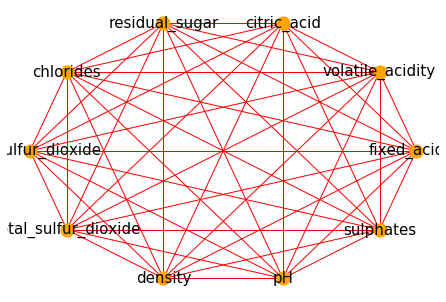

In [48]:
# correlation links
threshold = -1          

# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] >= threshold ) & (links['var1'] != links['var2']) ]
 
# Build graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# Plot the network
nx.draw_circular(G, with_labels=True, node_color='orange', node_size=200, edge_color='red', linewidths=0, font_size=15)

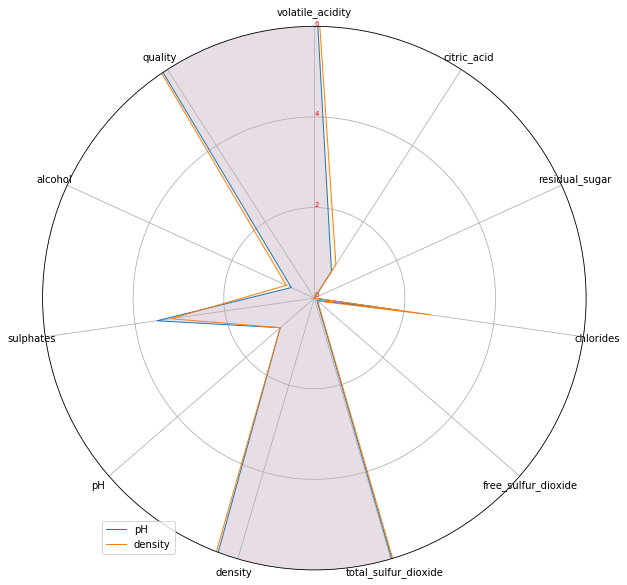

In [49]:
# spider graph quality vs pH and density
categories = list(wine)[1:]
N = len(categories)
angles = [ n / float(N)*2*pi for n in range(N)]
angles = angles + angles[:1]
plt.figure(figsize = (10,10))
ax = plt.subplot(111,polar = True)
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1],categories)
ax.set_rlabel_position(0)
plt.yticks([0,2,4,6],["0","2","4","6"],color= "red", size = 7)
plt.ylim(0,6)

values = wine.loc[0].drop("quality").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="pH" )
ax.fill(angles,values,"b",alpha=0.1)

values = wine.loc[1].drop("quality").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="density" )
ax.fill(angles,values,"orange",alpha=0.1)
plt.legend(loc = "upper left",bbox_to_anchor = (0.1,0.1))
plt.show()

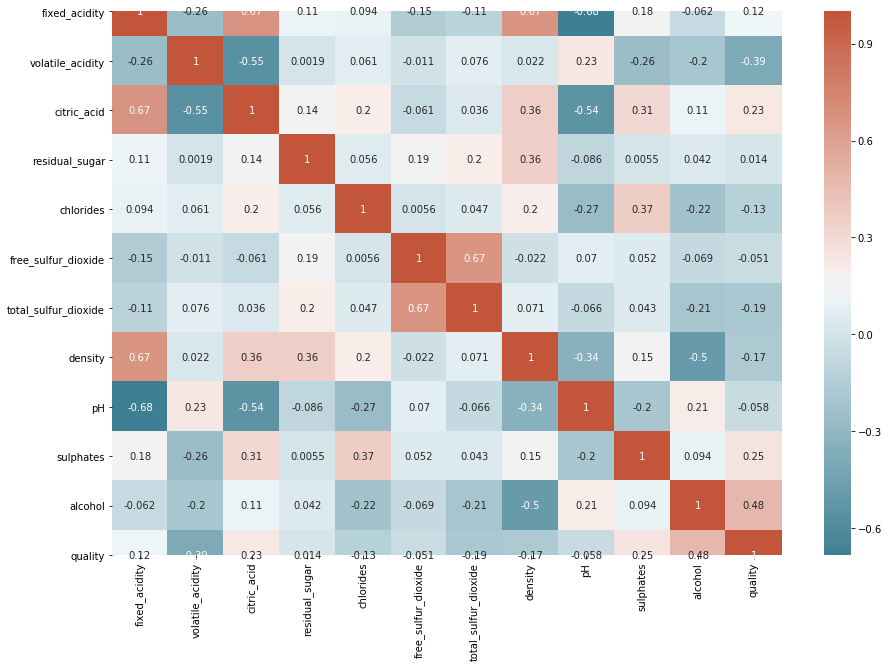

In [50]:
corr = wine.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [51]:
corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

Observation:
    
Quality is highly correlated with alcohol

Alcohol is negatively correlated with density -0.5

Density is highly positively correlated with fixed acidity

Volatile acidity is negatively correlated with quality and citric acid

Free sulphuric acid is highly correlated with total sulfur dioxide

Conclusion can be made that the attributes alcohol, sulphates, citric acid, fixed acidity have maximum correlation with 'quality'


In [52]:
# 3D Scatter Plot for good quality vs density, pH and sulphates
quality6 = wine[wine.quality ==6]

quality7 = wine[wine.quality == 7]

# # data 
quality8 = wine[wine.quality == 8]

# trace1
trace1 = go.Scatter3d(
    x=quality6.pH,
    y=quality6.density,
    z=quality6.sulphates,
    mode='markers',
    name = "quality-6",
    marker=dict(
        color='rgb(100, 101, 101)',
        size=12,
        line=dict(
            color='rgb(100, 100, 100)',
            width=0.1
        )
    )
)


# trace2 
trace2 = go.Scatter3d(
    x=quality7.pH,
    y=quality7.density,
    z=quality7.sulphates,
    mode='markers',
    name = "quality-7",
    marker=dict(
        color='rgb(217, 100, 100)',
        size=12,
        line=dict(
            color='rgb(255, 255, 255)',
            width=0.1
        )
    )
)
# trace3 
trace3 = go.Scatter3d(
    x=quality8.pH,
    y=quality8.density,
    z=quality8.sulphates,
    mode='markers',
    name = "quality-8",
    marker=dict(
        color='rgb(54, 170, 127)',
        size=12,
        line=dict(
            color='rgb(204, 204, 204)',
            width=0.1
        )
    )
)
data2 = [trace1, trace2, trace3]
layout = go.Layout(
    title = ' 3D quality-7 and quality-8',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data2, layout=layout)
iplot(fig)

In [53]:
# Create Classification version of target variable
wine['rating'] = [1 if x >= 6 else 0 for x in wine['quality']]

# Good quality becomes 1 and Bad quality becomes 0

# Separate feature variables and target variable

X = wine.drop(['quality','rating'], axis = 1)
y = wine['rating']

In [54]:
# See proportion of good vs bad wines
wine['rating'].value_counts()

1    855
0    744
Name: rating, dtype: int64

In [55]:
wine.groupby('rating').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
0,8.142204,0.589503,0.237755,2.542070,0.092989,16.567204,54.645161,0.997068,3.311653,0.618535,9.926478,4.901882
1,8.474035,0.474146,0.299883,2.535965,0.082661,15.272515,39.352047,0.996467,3.310643,0.692620,10.855029,6.274854


[Text(0, 0.5, 'Alcohol Percent'),
 Text(0.5, 0, 'Wine Quality'),
 Text(0.5, 1.0, 'Alcohol percent in different wine quality types')]

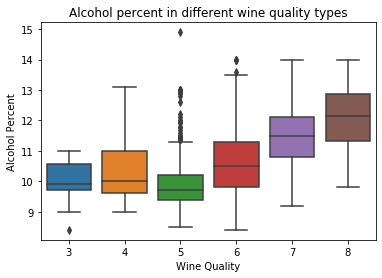

In [56]:
# Analysis of alcohol percentage with wine quality
bx = sns.boxplot(x="quality", y='alcohol', data = wine)
bx.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol percent in different wine quality types')

Observation

Alcohol content increases as the quality of wine increases

[Text(0, 0.5, 'pH'),
 Text(0.5, 0, 'Wine Ratings'),
 Text(0.5, 1.0, 'pH in different types of Wine ratings')]

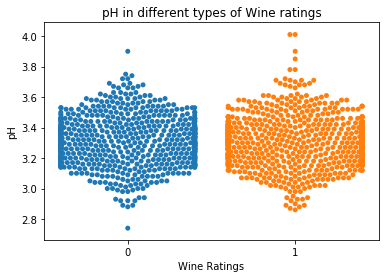

In [57]:
# Analysis of pH & wine ratings
bx = sns.swarmplot(x="rating", y="pH", data = wine);
bx.set(xlabel='Wine Ratings', ylabel='pH', title='pH in different types of Wine ratings')

[Text(0, 0.5, 'Sulphates'),
 Text(0.5, 0, 'Wine Ratings'),
 Text(0.5, 1.0, 'Sulphates in different types of Wine ratings')]

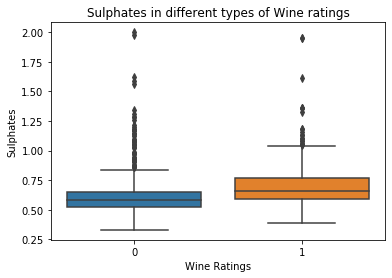

In [58]:
# Analysis of sulphates & wine ratings
bx = sns.boxplot(x="rating", y='sulphates', data = wine)
bx.set(xlabel='Wine Ratings', ylabel='Sulphates', title='Sulphates in different types of Wine ratings')



[Text(0, 0.5, 'Citric Acid'),
 Text(0.5, 0, 'Quality'),
 Text(0.5, 1.0, 'Citric_acid in different types of Wine ratings')]

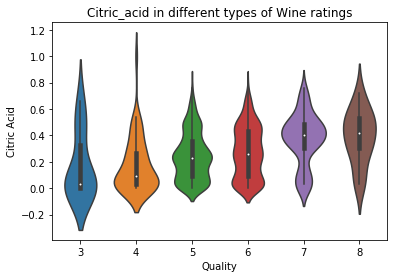

In [59]:
# Analysis of Citric Acid & wine ratings
bx = sns.violinplot(x="quality", y='citric_acid', data = wine)
bx.set(xlabel='Quality', ylabel='Citric Acid', title='Citric_acid in different types of Wine ratings')



[Text(0, 0.5, 'Fixed Acidity'),
 Text(0.5, 0, 'Wine Ratings'),
 Text(0.5, 1.0, 'Fixed Acidity in different types of Wine ratings')]

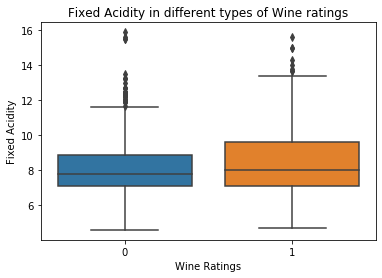

In [60]:
# Analysis of fixed acidity & wine ratings
bx = sns.boxplot(x="rating", y='fixed_acidity', data = wine)
bx.set(xlabel='Wine Ratings', ylabel='Fixed Acidity', title='Fixed Acidity in different types of Wine ratings')

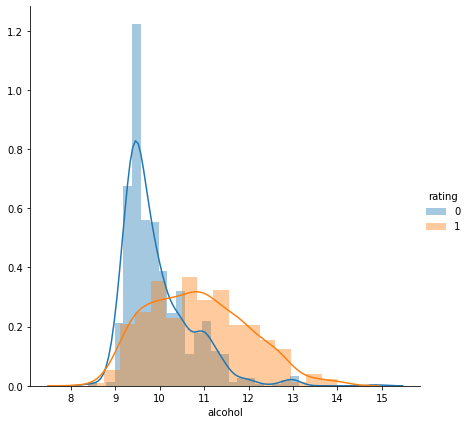

In [61]:
# Distribution plots
sns.FacetGrid(wine,hue='rating',height=6).map(sns.distplot,'alcohol').add_legend()

Observation



There is a higher probability of good quality wine, if alcohol content is >= 12

The probability of good quality wine decreases as alcohol content decreases

Sulphates level increases with the quality of wine

Citric acid increases as quality of the wine increases

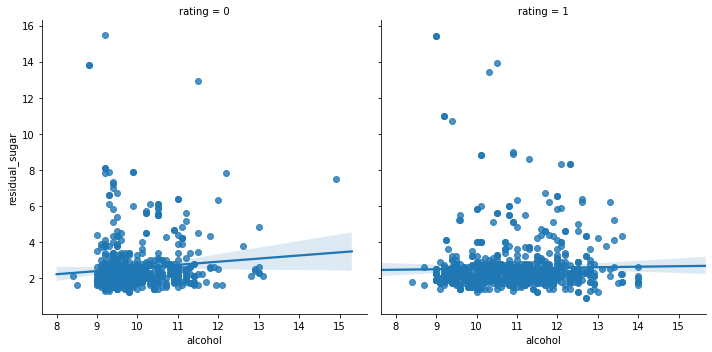

In [62]:
# Linear Regression
# The graph below shows a linear regression between residual sugar and alcohol content for different quality ratings(bad, good)
sns.lmplot(x = 'alcohol', y = 'residual_sugar', col = 'rating', data = wine)

 
Observation

An observation can be made that in both types of wine the residual sugar content remains almost the same irrespective of change in alcohol content value.

# Building a Machine Learning Model

In [63]:
# Normalize feature variables and apply Standard Scaling to get optimized result
sc=StandardScaler()
X_features = X
X = sc.fit_transform(X)

In [64]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

************** LogisticRegression ***********


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy score 0.755
Cross-val-score= 0.7337641607094028


roc_auc_score 0.7532369578881207


              precision    recall  f1-score   support

           0       0.74      0.73      0.73       185
           1       0.77      0.78      0.77       215

    accuracy                           0.76       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.76      0.75       400



[[135  50]
 [ 48 167]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model

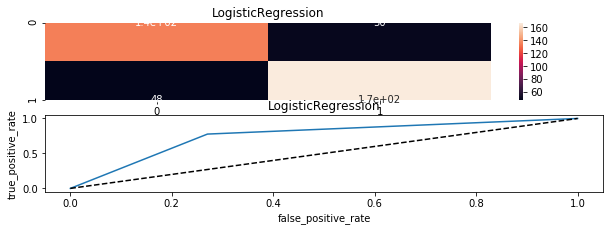

************** Naive Bayes ***********


GaussianNB(priors=None, var_smoothing=1e-09)


accuracy score 0.7375
Cross-val-score= 0.7168847415914683


roc_auc_score 0.7346951602765557


              precision    recall  f1-score   support

           0       0.72      0.70      0.71       185
           1       0.75      0.77      0.76       215

    accuracy                           0.74       400
   macro avg       0.74      0.73      0.74       400
weighted avg       0.74      0.74      0.74       400



[[129  56]
 [ 49 166]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


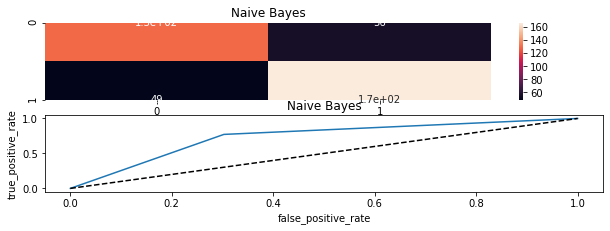

In [65]:
# Applying Machine Learning Algorithms
lg=LogisticRegression()
gnb = GaussianNB()

# Prepare models
models=[]
models.append(('LogisticRegression',lg))
models.append(('Naive Bayes',gnb))

# Evaluate each model
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
 print('**************',name,'***********')
 print('\n')
 Model.append(name)
 model.fit(X_train,y_train)
 print(model)
 predictions=model.predict(X_test)
 print('\n')
 acc=accuracy_score(y_test,predictions)
 print('accuracy score',acc)
 score.append(acc*100)
 cv=model_selection.cross_val_score(model,X,y,cv=10,scoring='accuracy').mean()
 print('Cross-val-score=',cv)
 cvs.append(cv*100)
 print('\n')
 false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,predictions)
 roc_auc=roc_auc_score(y_test,predictions)
 print('roc_auc_score',roc_auc)
 rocscore.append(roc_auc*100)
 print('\n')
 print(classification_report(y_test,predictions))
 print('\n')
 cm=confusion_matrix(y_test,predictions)
 print(cm)
 print('\n')
 plt.figure(figsize=(10,15))
 plt.subplot(911)
 plt.title(name)
 print(sns.heatmap(cm,annot=True))
 plt.subplot(912)
 plt.title(name)
 plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
 plt.plot([0,1],[0,1],'k--')
 plt.xlabel('false_positive_rate')
 plt.ylabel('true_positive_rate')
 plt.show()

Selecting Best Model:

The precision of predicting good quality wine (1) is 77% whereas prediction of bad quality wine is 74%.

From above table we can observe the accuracy for Logistic Regression is 76% compared to Naive Bayes, 74%.This looks like a good score.

Logistic Regression model has a higher Cross-val-score of 73%.

Overall performance of the Logistic Regression algorithm is good.

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

AUC(Area Under Curve) score for the case is 0.75. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

In [66]:
# Show Mean Absolute Error, Mean Squared Error & Root Mean Squared Error 
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2625
MSE: 0.2625
RMSE: 0.51234753829798


In [67]:
print(lg.intercept_)

[0.25480008]


In [68]:
# Show R squared value for regression
print('R squared value: ',lg.score(X_train,y_train))

R squared value:  0.7422852376980817


In [69]:
# Correlation
print('Correlation: ', math.sqrt(lg.score(X_train,y_train)))

Correlation:  0.8615597702412072


In [70]:
# Confusion Matrix
y_predicted = lg.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[135,  50],
       [ 48, 167]], dtype=int64)

In [71]:
# True positive is 135(34%), false negative is 50(12%)
# False positive is 48(12%), true negative, 167(42%)

# true positives: These are cases in which we predicted yes and are actually yes.
# true negatives: Cases predicted no, and no in actual.
# false positives: Cases predicted yes, but actual is no. 
# false negatives: Cases predicted no, yes in actual. 

In [72]:
# Predicting Values Logistic Regression
lg.fit(X_train,y_train)
predictions=lg.predict(X_test)
print('predicted :',predictions)
print('actual',y_test)

predicted : [1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0
 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1
 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1
 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1
 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1
 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1
 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0
 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0
 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0]
actual 1109    1
1032    0
1002    1
487     1
979     0
       ..
489     1
362     0
526     0
442     1
1229    0
Name: rating, Length: 400, dtype: int64


C:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [73]:
# Converting the numpy array to list
x=np.array(y_predicted).tolist()

# Printing first 5 predictions
print("\nThe prediction:\n")
for i in range(0,5):
    print (x[i])
    
# Printing first five expectations
print("\nThe expectation:\n")
print (y_test.head())


The prediction:

1
0
1
0
1

The expectation:

1109    1
1032    0
1002    1
487     1
979     0
Name: rating, dtype: int64


Observation

Almost all of the values in the prediction are similar to the expectations. 

Our model predicted wrongly a 0 as 1 for the first 5 predictions showing that our model performs well



In [74]:
# More detailed prediction vs actual
predictions = lg.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
1109,1,1
1032,0,0
1002,1,1
487,0,1
979,1,0
...,...,...
489,1,1
362,0,0
526,1,0
442,1,1


# Saving Model using Joblib

In [75]:
# Save model using joblib
from sklearn.externals import joblib

# Save the model in a file
joblib.dump(lg,'finalized_model_joblib.obj')

# Load the model from a file
lg_from_joblib=joblib.load('finalized_model_joblib.obj')

# Use the loaded model to make prediction
result = lg_from_joblib.predict(X_test)
result_accuracy = lg_from_joblib.score(X_test, y_test)

print(result)
print(result_accuracy)

[1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0
 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1
 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1
 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1
 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1
 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1
 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0
 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0
 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0]
0.755


In [76]:
# An estimate of 76% the accuracy of the model on unseen data is reported

In [77]:
# Filtering DataFrame for only good quality
wine_good = wine[wine['rating']==1]
wine_good.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,rating
count,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.0
mean,8.474035,0.474146,0.299883,2.535965,0.082661,15.272515,39.352047,0.996467,3.310643,0.692620,10.855029,6.274854,1.0
std,1.862795,0.161999,0.199889,1.424835,0.037258,10.038538,27.253280,0.002067,0.154554,0.155558,1.106109,0.491627,0.0
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.390000,8.400000,6.000000,1.0
25%,7.100000,0.350000,0.115000,1.900000,0.067000,7.000000,20.000000,0.995185,3.210000,0.590000,10.000000,6.000000,1.0
50%,8.000000,0.460000,0.310000,2.200000,0.077000,13.000000,33.000000,0.996400,3.310000,0.660000,10.800000,6.000000,1.0
75%,9.650000,0.580000,0.460000,2.600000,0.087500,20.500000,50.000000,0.997685,3.400000,0.770000,11.700000,7.000000,1.0
max,15.600000,1.040000,0.780000,15.400000,0.415000,72.000000,289.000000,1.003690,4.010000,1.950000,14.000000,8.000000,1.0


We can see that good quality wines have:

higher levels of alcohol on average
lower volatile acidity on average 
higher levels of sulphates on average
higher levels of residual sugar on average.

In [78]:
# Filtering Dataframe for only bad quality
wine_bad = wine[wine['rating']==0]
wine_bad.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,rating
count,744.000000,744.000000,744.000000,744.00000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.0
mean,8.142204,0.589503,0.237755,2.54207,0.092989,16.567204,54.645161,0.997068,3.311653,0.618535,9.926478,4.901882,0.0
std,1.572396,0.177956,0.183368,1.39355,0.055781,10.890291,36.720468,0.001598,0.154296,0.176194,0.758007,0.339894,0.0
min,4.600000,0.180000,0.000000,1.20000,0.039000,3.000000,6.000000,0.992560,2.740000,0.330000,8.400000,3.000000,0.0
25%,7.100000,0.460000,0.080000,1.90000,0.074000,8.000000,23.750000,0.996120,3.200000,0.520000,9.400000,5.000000,0.0
50%,7.800000,0.590000,0.220000,2.20000,0.081000,14.000000,45.000000,0.996935,3.310000,0.580000,9.700000,5.000000,0.0
75%,8.900000,0.680000,0.360000,2.60000,0.094000,23.000000,78.000000,0.997900,3.400000,0.650000,10.300000,5.000000,0.0
max,15.900000,1.580000,1.000000,15.50000,0.611000,68.000000,155.000000,1.003150,3.900000,2.000000,14.900000,5.000000,0.0


Conclusion 

Observations were made that the key factors that determine and affects the quality of the red wine. Wine quality is ultimately a subjective measure.

To make the predictions of wine quality we trained two models. As seen, the Logistic Regression and Naive Bayes model . The Logistic Regression performed marginally better and we decided to stick to this model.

It is possible to increase the quality of the wine, if variables such as residual sugars and alcohol are controlled.